In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from qbstyles import mpl_style
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix

plt.style.use("../mpl styles/dracula.mplstyle")
mpl_style(dark=True)

In [98]:
def f(w, X, b):
    return X @ w + b

def sigmoid(w, X, b):
    z = f(w, X, b)
    return 1 / (1 + np.exp(-z))

def line_equation(model, X, df, features, target, class_="class"):
    w = model.coef_[0]
    b = model.intercept_
    y = f(w, X, b)
    sns.scatterplot(x=df[features[0]], y=df[target], hue=df[class_], s=100)
    # plt.plot(X, y, color="cyan")
    plt.plot(np.ones_like(y) * (-b / w), y, color="cyan")

def sigmoid_equation(model, X, df):
    y = model.predict_proba(X)[:, 1]
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
    plt.plot(X, y)
    
def get_misclassified_examples(X, y_true, y_pred):
    misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred]
    misclassified_X = X.iloc[misclassified_indices].copy()  # copy to avoid SettingWithCopyWarning
    misclassified_X['predicted'] = pd.Series(y_pred)[misclassified_indices].values
    return misclassified_X

$
    \sigma(w, X, b) = \frac{1}{1 + e^{-f(w, X, b)}} = \frac{1}{1 + e^{-(Xw + b)}}
$

In [92]:
age = np.arange(37)
y = np.zeros_like(age)
adult = age > 18


df = pd.DataFrame({"y": y, "age": age, "class": adult})
df = df[~df['age'].between(15, 18)]
df

,y,age,class
0,0,0,False
1,0,1,False
2,0,2,False
3,0,3,False
4,0,4,False
5,0,5,False
6,0,6,False
7,0,7,False
8,0,8,False
9,0,9,False


In [93]:
features = ["age"]
linear_target = "y"
logistic_target = "class"

X = df[features]
linear_y = df[logistic_target]
logistic_y = df[logistic_target]

linear = LinearRegression()
logistic = LogisticRegression()

linear.fit(X, linear_y)
logistic.fit(X, logistic_y);

In [71]:
linear.coef_, linear.intercept_

(array([0.]), np.float64(0.0))

In [72]:
logistic.coef_, logistic.intercept_

(array([[0.93765772]]), array([-15.47133247]))

<Axes: xlabel='age', ylabel='y'>

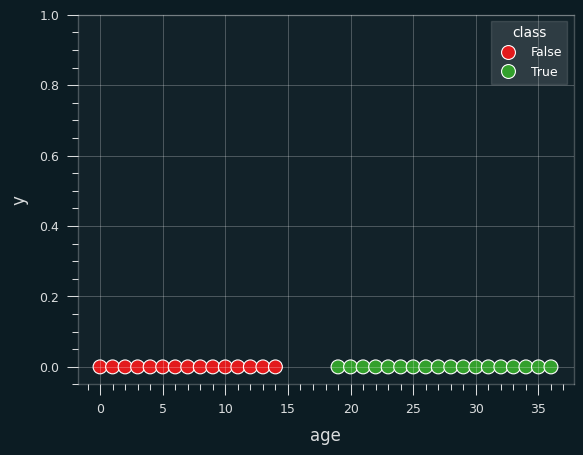

In [95]:
plt.ylim(-0.05, 1)

sns.scatterplot(x="age", y="y", data=df, hue="class", color=["pink", "blue"], s=100)

In [ ]:
df['adult'].value_counts()

adult
False    19
True     18
Name: count, dtype: int64

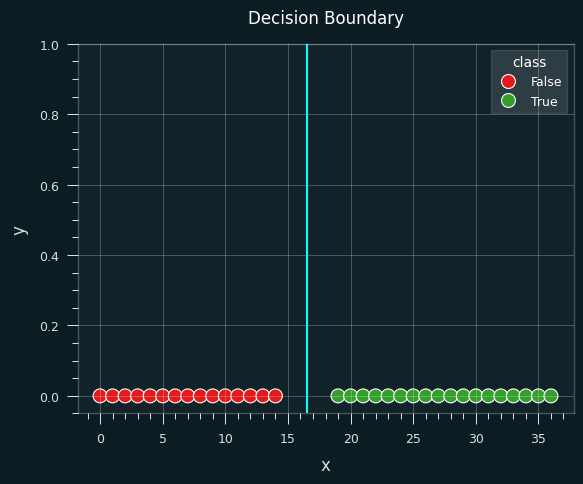

In [101]:
plt.ylim(-0.05, 1)
plt.xlabel("x")
plt.title("Decision Boundary")
line_equation(logistic, X, df, features, linear_target)

In [83]:
logistic.coef_[0] * X + logistic.intercept_ == 0

,age
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False
